# Used Car sales data set

Source: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data 

### Purpose of predictive model
This application will provide you with an amount that you can expect to sell for your car for on Craiglist. 

Disclaimer: this tool is only intended as a guide to help you decide your car sale price. What you decide to ask for is entirely up to you. Remember: your car is only worth what someone else is prepared to pay for it ;-)     

Craig list car sales: https://sfbay.craigslist.org/search/cta

Consider following feature: 
* how much do you want to sell your car for 
* is it a good or bad deal? 

include a custom search link: https://sfbay.craigslist.org/search/cta?query=mustang+gt+convertible

In [117]:
import pandas as pd
import numpy as np
# from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn import metrics

import os

import plotly as py 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FILE = "s:/Data/used_car_sales/vehicles.csv"

# only load columns for regression model
# exclude high cardinality columns - such as model 
# except for id, the other ones will be considered for regression  modeling

USE_COLUMNS = [
    'id',
#     'url',
#     'region',
#     'region_url',
    'price',
    'year',
    'manufacturer',
   'model',
    'condition',
    'cylinders',
    'fuel',
    'odometer',
#    'title_status',
    'transmission',
#     'VIN',
#    'drive',
    'size',
    'type',
#    'paint_color',
#     'image_url',
#     'description',
#     'county',
    'state',
#     'lat',
#     'long'
#    'posting_date'
]

COL_DATA_TYPES = {
     'id': object,
#     'url',
#     'region',
#     'region_url',
    'price': float,
    'year': float,
#     'manufacturer',
#     'model',
#     'condition',
#     'cylinders',
#     'fuel',
    'odometer': float,
#     'title_status',
#     'transmission',
#     'VIN',
#     'drive',
#     'size',
#     'type',
#     'paint_color',
#     'image_url',
#     'description',
#     'county',
#     'state',
    'lat': float,
    'long': float
#     'posting_date'
}

In [3]:
df = pd.read_csv(DATA_FILE, usecols = USE_COLUMNS, dtype=COL_DATA_TYPES)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  object 
 1   price         426880 non-null  float64
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   transmission  424324 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(3), object(10)
memory usage: 42.3+ MB


In [5]:
# exclude records with null year, manufaturer   
df = df.dropna(subset=['year','manufacturer','type'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322856 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322856 non-null  object 
 1   price         322856 non-null  float64
 2   year          322856 non-null  float64
 3   manufacturer  322856 non-null  object 
 4   model         319948 non-null  object 
 5   condition     211580 non-null  object 
 6   cylinders     213643 non-null  object 
 7   fuel          321169 non-null  object 
 8   odometer      319544 non-null  float64
 9   transmission  321174 non-null  object 
 10  size          111572 non-null  object 
 11  type          322856 non-null  object 
 12  state         322856 non-null  object 
dtypes: float64(3), object(10)
memory usage: 34.5+ MB


In [7]:
df.nunique()

id              322856
price            13534
year               105
manufacturer        42
model            20677
condition            6
cylinders            8
fuel                 5
odometer         88865
transmission         3
size                 4
type                13
state               51
dtype: int64

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

<AxesSubplot:xlabel='fuel'>

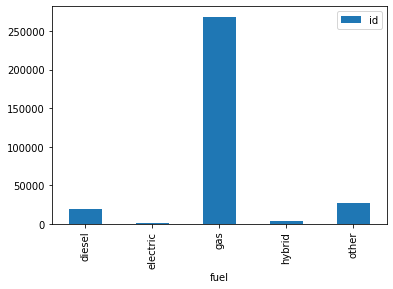

In [10]:
df[['fuel','id']].groupby('fuel').count().plot(kind='bar')

In [11]:
df['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

<AxesSubplot:xlabel='transmission'>

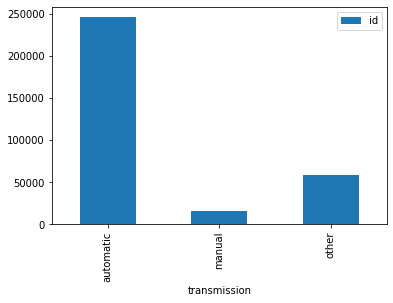

In [12]:
df[['transmission','id']].groupby('transmission').count().plot(kind='bar')

In [13]:
df['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'van', 'convertible', 'wagon',
       'bus'], dtype=object)

<AxesSubplot:xlabel='type'>

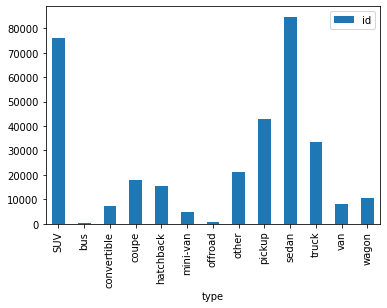

In [14]:
df[['type','id']].groupby('type').count().plot(kind='bar')

In [18]:
# update value 'other' to more specific value
df.loc[df[(df['fuel'] == 'other')].index,'fuel'] = 'other_fuel'
df.loc[df[(df['transmission'] == 'other')].index,'transmission'] = 'other_transmission'
df.loc[df[(df['type'] == 'other')].index,'type'] = 'other_type'

<AxesSubplot:xlabel='fuel'>

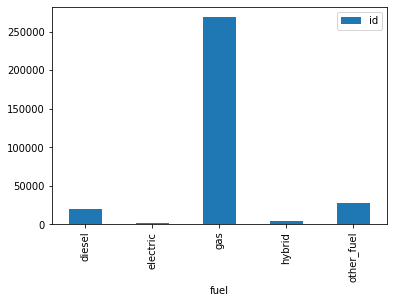

In [19]:
df[['fuel','id']].groupby('fuel').count().plot(kind='bar')

<AxesSubplot:xlabel='transmission'>

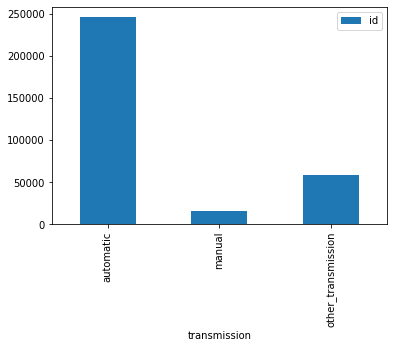

In [20]:
df[['transmission','id']].groupby('transmission').count().plot(kind='bar')

<AxesSubplot:xlabel='type'>

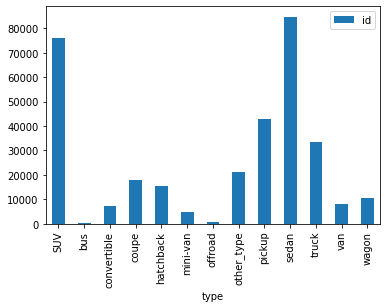

In [21]:
df[['type','id']].groupby('type').count().plot(kind='bar')

In [22]:
pd.set_option('display.max_rows', 15)

In [23]:
# just testing out the impact - reduce memory use of the data frame

df['year'] = df['year'].astype('int16')
df['manufacturer'] = df['manufacturer'].astype('category')
df['condition'] = df['condition'].astype('category')
df['cylinders'] = df['cylinders'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['size'] = df['size'].astype('category')
df['type'] = df['type'].astype('category')
df['state'] = df['state'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322856 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            322856 non-null  object  
 1   price         322856 non-null  float64 
 2   year          322856 non-null  int16   
 3   manufacturer  322856 non-null  category
 4   model         319948 non-null  object  
 5   condition     211580 non-null  category
 6   cylinders     213643 non-null  category
 7   fuel          321169 non-null  category
 8   odometer      319544 non-null  float64 
 9   transmission  321174 non-null  category
 10  size          111572 non-null  category
 11  type          322856 non-null  category
 12  state         322856 non-null  category
dtypes: category(8), float64(2), int16(1), object(2)
memory usage: 23.5+ MB


using categories cut down overall memory usage by half 

### regression model notes
* price is going to be our target variable 
* odometer reading will be broken down into bins 

In [24]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('^display.', silent=True)

In [25]:
df['price'].describe()

count       322856.00
mean         39467.82
std        7310057.02
min              0.00
25%           6500.00
50%          14999.00
75%          27500.00
max     3736928711.00
Name: price, dtype: float64

In [26]:
# Find out our predictors... using "correlations"
corrs = df.corr()
corrs['price'].sort_values()

year       -0.00
odometer    0.00
price       1.00
Name: price, dtype: float64

Will need to try that again after converting categories to numbers 

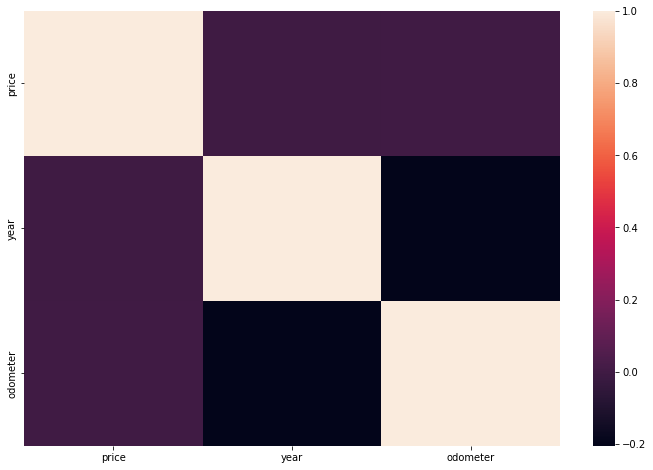

In [27]:
# heatmap correlations
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

In [28]:
np.sort(df['year'].unique())

array([1900, 1903, 1905, 1913, 1916, 1918, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1944, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int16)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,322856.00,39467.82,7310057.02,0.00,6500.00,14999.00,27500.00,3736928711.00
year,322856.00,2012.20,8.08,1900.00,2010.00,2014.00,2017.00,2022.00
odometer,319544.00,90087.64,163640.07,0.00,34605.00,79845.50,127222.25,10000000.00


In [30]:
# drop sales with a low price (i.e. less than 100) 
df = df[df['price'] > 100]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,295728.00,43088.11,7637978.89,101.00,8250.00,16988.00,28590.00,3736928711.00
year,295728.00,2012.02,8.21,1900.00,2009.00,2014.00,2017.00,2022.00
odometer,293960.00,90525.84,148097.55,0.00,34425.00,80602.00,129128.25,10000000.00


In [31]:
# examine high price data - as outliers
df[df['price'] > 250000].describe().T

,count,mean,std,min,25%,50%,75%,max
price,30.00,229043722.73,735289589.03,255000.00,348499.00,4497747.50,15836419.50,3736928711.00
year,30.00,2011.30,11.62,1970.00,2007.00,2016.50,2019.00,2021.00
odometer,30.00,79046.47,74170.79,22.00,3393.75,98000.00,108625.00,320000.00


In [32]:
# drop sales with a very high price (i.e > 250000)
df = df[df['price'] <= 250000]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,295698.00,19854.89,14728.08,101.00,8250.00,16988.00,28590.00,244999.00
year,295698.00,2012.02,8.21,1900.00,2009.00,2014.00,2017.00,2022.00
odometer,293930.00,90527.01,148103.23,0.00,34425.00,80602.00,129129.75,10000000.00


In [33]:
# updated price data set
df['price'].describe()

count   295698.00
mean     19854.89
std      14728.08
min        101.00
25%       8250.00
50%      16988.00
75%      28590.00
max     244999.00
Name: price, dtype: float64

<AxesSubplot:xlabel='year', ylabel='price'>

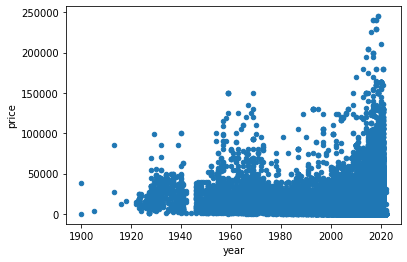

In [34]:
#scatter plot of price vs. year 
df.plot(kind="scatter", x="year", y="price")

There seems to be a trend where car price goes down for older cars, up to a point where it starts going up again - for instance, for cars older than 1980 (classic cars). And then the price trend goes down again for antique cars - i.e. prior to 1925. We will take this into account in the regression model by creating a car_categories of: `['modern','classic','antique']` 

These will appear as features in the regression model, so in preparation for that, we will create a matrix for these categories in the existing dataframe. 

In [35]:
# would catagorizing cars as classic if built prior to 1980, 
# increase the accuracy of our model? 
df['classic_car'] = 0 
df.loc[df[(df['year'] < 1980) & (df['year'] > 1925)].index,'classic_car'] = 1

df['modern_car'] = 0 
df.loc[df[(df['year'] >= 1980)].index,'modern_car'] = 1

df['antique_car'] = 0 
df.loc[df[(df['year'] <= 1925)].index,'antique_car'] = 1

In [36]:
df[(df['year'] < 1985) & (df['year'] > 1975)].sample(20)

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,size,type,state,classic_car,modern_car,antique_car
205585,7314972366,7000.00,1978,lincoln,mark v,good,8 cylinders,gas,42900.00,automatic,full-size,coupe,mi,1,0,0
227282,7313301472,25500.00,1979,ford,bronco 4x4,excellent,8 cylinders,gas,20000.00,automatic,full-size,truck,mt,1,0,0
120331,7304084510,22000.00,1976,chevrolet,c10,excellent,8 cylinders,gas,76000.00,automatic,full-size,truck,fl,1,0,0
422667,7315316326,18500.00,1976,pontiac,trans am,excellent,8 cylinders,gas,10000.00,manual,mid-size,coupe,wi,1,0,0
26214,7314669707,750.00,1980,cadillac,limousine,fair,8 cylinders,gas,100000.00,automatic,full-size,sedan,ca,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311705,7314169584,12000.00,1976,chevrolet,k10 4x4,good,8 cylinders,gas,200.00,manual,full-size,truck,or,1,0,0
151097,7304926408,9500.00,1982,lincoln,town car,excellent,8 cylinders,gas,137100.00,automatic,full-size,sedan,in,0,1,0
335474,7316926810,6900.00,1984,cadillac,fleetwood brougham,good,8 cylinders,gas,41032.00,automatic,full-size,sedan,pa,0,1,0
348557,7305384545,21000.00,1980,chevrolet,silverado,excellent,8 cylinders,gas,600.00,automatic,NaN,truck,sc,0,1,0


In [37]:
# Check "correlations"
corrs = df.corr()
corrs['price'].sort_values()

odometer      -0.24
classic_car   -0.01
antique_car   -0.00
modern_car     0.01
year           0.39
price          1.00
Name: price, dtype: float64

car type is apparently not so much a factor... will check again with fully numerical data set
odometer has a negative impact - the older the car, the less the value
year has a positive impact - the newer the car, the higher the value

In [38]:
df[df['odometer'] <= 10]['odometer'].count()

2164

In [39]:
# odo is required, and odo of 10 miles or less
df = df[df['odometer'] > 10]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,291766.00,19903.78,14663.25,101.00,8489.25,16990.00,28650.00,244999.00
year,291766.00,2012.05,8.08,1900.00,2009.00,2014.00,2017.00,2022.00
odometer,291766.00,91198.42,148445.35,11.00,35064.25,81347.00,129673.75,10000000.00
classic_car,291766.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00
modern_car,291766.00,0.99,0.11,0.00,1.00,1.00,1.00,1.00
antique_car,291766.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00


In [40]:
np.sort(df['manufacturer'].unique())

array(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari',
       'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai',
       'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus',
       'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini',
       'mitsubishi', 'morgan', 'nissan', 'pontiac', 'porsche', 'ram',
       'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [41]:
df['condition'].unique()

['good', 'excellent', 'fair', 'like new', 'new', NaN, 'salvage']
Categories (6, object): ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

<AxesSubplot:xlabel='condition'>

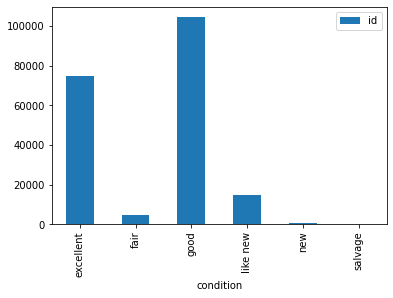

In [42]:
df[['condition','id']].groupby('condition').count().plot(kind='bar')

In [43]:
df[df['condition'] == 'good']['price'].describe()

count   104386.00
mean     22117.23
std      12906.83
min        101.00
25%      10000.00
50%      22590.00
75%      31990.00
max     175000.00
Name: price, dtype: float64

In [44]:
df[df['condition'] == 'excellent']['price'].describe()

count    74567.00
mean     15345.57
std      12185.75
min        108.00
25%       7000.00
50%      11995.00
75%      19789.00
max     204999.00
Name: price, dtype: float64

In [45]:
df['fuel'].unique()

['gas', 'other_fuel', 'diesel', 'hybrid', NaN, 'electric']
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other_fuel']

<AxesSubplot:xlabel='fuel'>

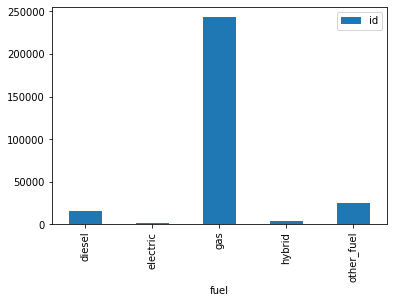

In [46]:
df[['fuel','id']].groupby('fuel').count().plot(kind='bar')

<AxesSubplot:xlabel='fuel'>

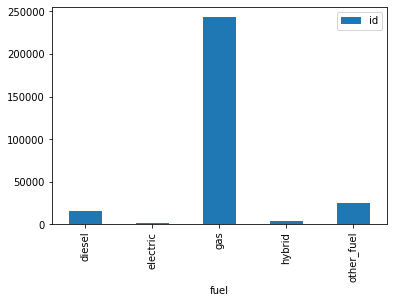

In [47]:
df[['fuel','id']].groupby('fuel').count().plot(kind='bar')

In [48]:
df['transmission'].unique()

['other_transmission', 'automatic', 'manual', NaN]
Categories (3, object): ['automatic', 'manual', 'other_transmission']

<AxesSubplot:xlabel='transmission'>

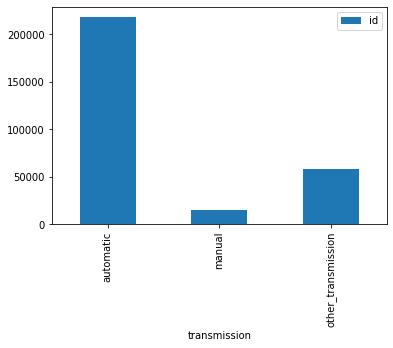

In [49]:
df[['transmission','id']].groupby('transmission').count().plot(kind='bar')

In [50]:
df['size'].unique()

[NaN, 'full-size', 'mid-size', 'compact', 'sub-compact']
Categories (4, object): ['compact', 'full-size', 'mid-size', 'sub-compact']

<AxesSubplot:xlabel='size'>

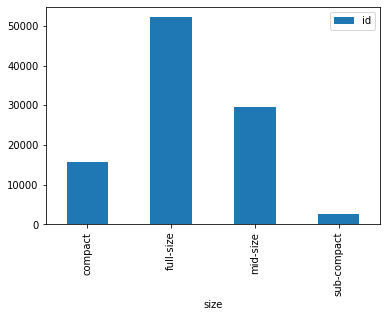

In [51]:
df[['size','id']].groupby('size').count().plot(kind='bar')

In [52]:
df['type'].unique()

['pickup', 'truck', 'other_type', 'coupe', 'SUV', ..., 'offroad', 'convertible', 'wagon', 'van', 'bus']
Length: 13
Categories (13, object): ['SUV', 'bus', 'convertible', 'coupe', ..., 'sedan', 'truck', 'van', 'wagon']

<AxesSubplot:xlabel='type'>

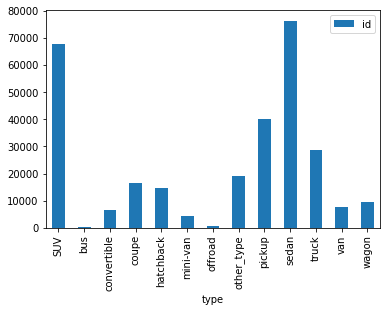

In [53]:
df[['type','id']].groupby('type').count().plot(kind='bar')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291766 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            291766 non-null  object  
 1   price         291766 non-null  float64 
 2   year          291766 non-null  int16   
 3   manufacturer  291766 non-null  category
 4   model         289355 non-null  object  
 5   condition     199436 non-null  category
 6   cylinders     196150 non-null  category
 7   fuel          290132 non-null  category
 8   odometer      291766 non-null  float64 
 9   transmission  290405 non-null  category
 10  size          100096 non-null  category
 11  type          291766 non-null  category
 12  state         291766 non-null  category
 13  classic_car   291766 non-null  int64   
 14  modern_car    291766 non-null  int64   
 15  antique_car   291766 non-null  int64   
dtypes: category(8), float64(2), int16(1), int64(3), object(2)
memory usage: 2

### Fill in the data gaps
1. `model` missing for some records. However, there are over 20k different model descriptions. It is so granular, it should probably be examine further to categorize in fewer categories? For now, will rely only on manufacturer for initial iteration of the regression
1. condition will default to `good` 
1. cylinders will ignore for now and exclude from the regression model 
1. fuel - will default to `gas` 
1. transmission will default to `automatic` 
1. size has a lot of missing records... will ignore and only rely on type 

In [55]:
# condition
df['condition'].fillna('good', inplace=True)
df['condition'].unique()


['good', 'excellent', 'fair', 'like new', 'new', 'salvage']
Categories (6, object): ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

<AxesSubplot:xlabel='condition'>

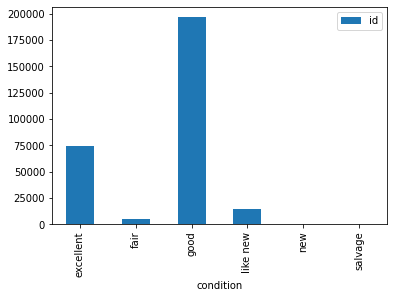

In [56]:
df[['condition','id']].groupby('condition').count().plot(kind='bar')

In [57]:
# fuel
df['fuel'].fillna('gas', inplace=True)
df['fuel'].unique()


['gas', 'other_fuel', 'diesel', 'hybrid', 'electric']
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other_fuel']

<AxesSubplot:xlabel='fuel'>

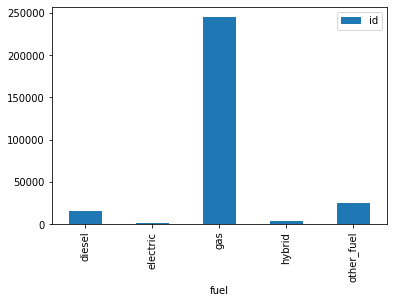

In [58]:
df[['fuel','id']].groupby('fuel').count().plot(kind='bar')

In [59]:
# transmission
df['transmission'].fillna('automatic', inplace=True)
df['transmission'].unique()


['other_transmission', 'automatic', 'manual']
Categories (3, object): ['automatic', 'manual', 'other_transmission']

<AxesSubplot:xlabel='transmission'>

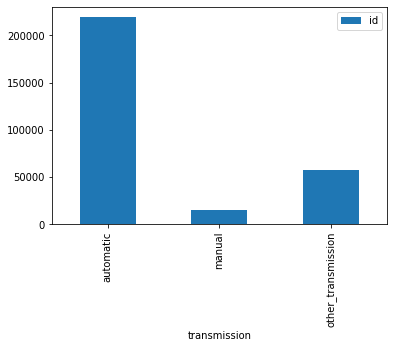

In [60]:
df[['transmission','id']].groupby('transmission').count().plot(kind='bar')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291766 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            291766 non-null  object  
 1   price         291766 non-null  float64 
 2   year          291766 non-null  int16   
 3   manufacturer  291766 non-null  category
 4   model         289355 non-null  object  
 5   condition     291766 non-null  category
 6   cylinders     196150 non-null  category
 7   fuel          291766 non-null  category
 8   odometer      291766 non-null  float64 
 9   transmission  291766 non-null  category
 10  size          100096 non-null  category
 11  type          291766 non-null  category
 12  state         291766 non-null  category
 13  classic_car   291766 non-null  int64   
 14  modern_car    291766 non-null  int64   
 15  antique_car   291766 non-null  int64   
dtypes: category(8), float64(2), int16(1), int64(3), object(2)
memory usage: 2

### Setup data for regression modeling 

In [62]:
# create model for state of california
df_model = df[df['state'] == 'ca'][['price',
              'year',
              'manufacturer',
              'condition',
              'fuel',
              'odometer',
              'transmission',
              'type',
#               'state',
              'classic_car',
              'modern_car',
              'antique_car']]

In [63]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34002 entries, 21171 to 71784
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   price         34002 non-null  float64 
 1   year          34002 non-null  int16   
 2   manufacturer  34002 non-null  category
 3   condition     34002 non-null  category
 4   fuel          34002 non-null  category
 5   odometer      34002 non-null  float64 
 6   transmission  34002 non-null  category
 7   type          34002 non-null  category
 8   classic_car   34002 non-null  int64   
 9   modern_car    34002 non-null  int64   
 10  antique_car   34002 non-null  int64   
dtypes: category(5), float64(2), int16(1), int64(3)
memory usage: 1.8 MB


In [64]:
# create a function to encode multiple columns
def encode_cols(df,col_list):
    for c in col_list:
        ohe=pd.get_dummies(df[c])
        df=pd.concat([df, ohe], axis=1) 
    return df

In [65]:
# manufacturer encoding 
# ohe=pd.get_dummies(df_model['manufacturer'])
# print(ohe.columns)
# ohe.head()

In [66]:
df_model.columns

Index(['price', 'year', 'manufacturer', 'condition', 'fuel', 'odometer',
       'transmission', 'type', 'classic_car', 'modern_car', 'antique_car'],
      dtype='object')

In [67]:
category_cols = list(df_model.select_dtypes(include='category'))
print(category_cols)

['manufacturer', 'condition', 'fuel', 'transmission', 'type']


In [68]:
df_model = encode_cols(df_model,category_cols)

df_model.columns

Index(['price', 'year', 'manufacturer', 'condition', 'fuel', 'odometer',
       'transmission', 'type', 'classic_car', 'modern_car', 'antique_car',
       'acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari',
       'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai',
       'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln',
       'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan',
       'nissan', 'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru',
       'tesla', 'toyota', 'volkswagen', 'volvo', 'excellent', 'fair', 'good',
       'like new', 'new', 'salvage', 'diesel', 'electric', 'gas', 'hybrid',
       'other_fuel', 'automatic', 'manual', 'other_transmission', 'SUV', 'bus',
       'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad',
       'other_type', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype='object')

In [69]:
df_model.shape

(34002, 80)

In [70]:
df_model.sample(25)

,price,year,manufacturer,condition,fuel,odometer,transmission,type,classic_car,modern_car,...,coupe,hatchback,mini-van,offroad,other_type,pickup,sedan,truck,van,wagon
67523,2995.00,1995,ford,good,gas,100683.00,automatic,SUV,0,1,...,0,0,0,0,0,0,0,0,0,0
64800,9995.00,2007,honda,good,gas,138504.00,automatic,SUV,0,1,...,0,0,0,0,0,0,0,0,0,0
48090,12995.00,2013,ford,good,gas,113073.00,automatic,SUV,0,1,...,0,0,0,0,0,0,0,0,0,0
43568,6985.00,2003,bmw,good,gas,115753.00,automatic,sedan,0,1,...,0,0,0,0,0,0,1,0,0,0
38249,23990.00,2013,nissan,good,other_fuel,44396.00,other_transmission,pickup,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50819,19991.00,2018,mazda,good,gas,77119.00,automatic,wagon,0,1,...,0,0,0,0,0,0,0,0,0,1
53958,32997.00,2017,acura,good,gas,31083.00,automatic,SUV,0,1,...,0,0,0,0,0,0,0,0,0,0
53197,6990.00,2008,chevrolet,excellent,gas,122000.00,automatic,sedan,0,1,...,0,0,0,0,0,0,1,0,0,0
37676,17991.00,2018,ford,good,gas,48899.00,automatic,sedan,0,1,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# Check "correlations" again
corrs = df_model.corr()
corr_factors = corrs['price'].sort_values()

pd.set_option('display.max_rows', None)
print(corr_factors)
pd.set_option('display.max_rows', 10)


gas                  -0.26
odometer             -0.24
sedan                -0.20
automatic            -0.20
excellent            -0.16
fair                 -0.13
honda                -0.10
hatchback            -0.09
nissan               -0.09
hyundai              -0.08
manual               -0.08
mini-van             -0.07
wagon                -0.06
volkswagen           -0.06
kia                  -0.05
toyota               -0.05
chrysler             -0.05
salvage              -0.05
SUV                  -0.04
mercury              -0.04
saturn               -0.04
subaru               -0.04
mazda                -0.04
modern_car           -0.04
dodge                -0.04
hybrid               -0.03
mitsubishi           -0.03
pontiac              -0.03
mini                 -0.03
fiat                 -0.02
buick                -0.02
offroad              -0.02
datsun               -0.01
harley-davidson      -0.01
bus                  -0.01
like new             -0.01
land rover           -0.00
v

Observations: 
* unless it is a ferrari or Ram, the brand has little impact on the car price


In [74]:
corr_factors.info

<bound method Series.info of gas                  -0.26
odometer             -0.24
sedan                -0.20
automatic            -0.20
excellent            -0.16
                      ... 
other_transmission    0.27
pickup                0.28
year                  0.32
price                 1.00
morgan                 NaN
Name: price, Length: 75, dtype: float64>

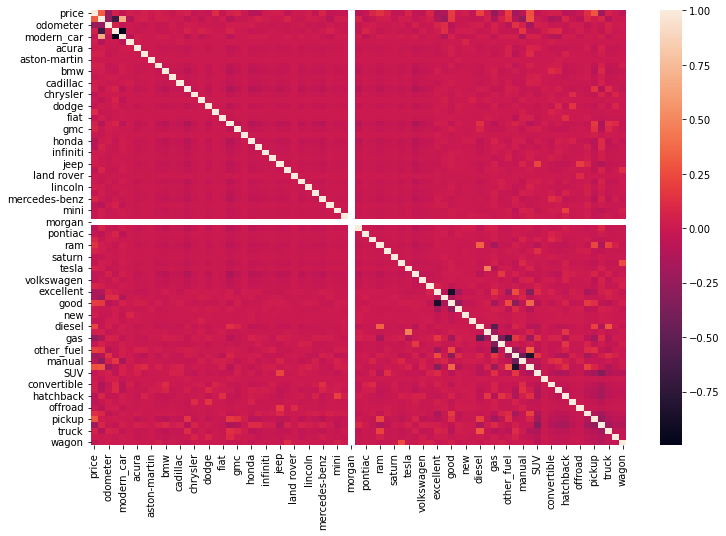

In [75]:
# heatmap correlations
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

In [130]:
# restrict to relevant features
df_model = df_model[[
    'price',
    'year',
    'odometer',
    'ferrari',
#     'ram',
    'gas',
    'diesel',
    'other_fuel',

    'sedan',
    'pickup',
    'other_type',

    'automatic',
    'other_transmission',

    'excellent',
    'good',
    'fair'
    ]].copy()
df_model.head()

,price,year,odometer,ferrari,gas,diesel,other_fuel,sedan,pickup,other_type,automatic,other_transmission,excellent,good,fair
21171,16990.00000,2018,16930.00000,0,1,0,0,1,0,0,0,1,0,1,0
21174,11975.00000,2003,207000.00000,0,1,0,0,0,1,0,1,0,1,0,0
21176,21950.00000,2003,202537.00000,0,0,1,0,0,0,0,1,0,1,0,0
21178,27590.00000,2018,20420.00000,0,1,0,0,1,0,0,0,1,0,1,0
21179,21990.00000,2018,7233.00000,0,1,0,0,0,0,1,0,1,0,1,0


In [131]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34002 entries, 21171 to 71784
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               34002 non-null  float64
 1   year                34002 non-null  int16  
 2   odometer            34002 non-null  float64
 3   ferrari             34002 non-null  uint8  
 4   gas                 34002 non-null  uint8  
 5   diesel              34002 non-null  uint8  
 6   other_fuel          34002 non-null  uint8  
 7   sedan               34002 non-null  uint8  
 8   pickup              34002 non-null  uint8  
 9   other_type          34002 non-null  uint8  
 10  automatic           34002 non-null  uint8  
 11  other_transmission  34002 non-null  uint8  
 12  excellent           34002 non-null  uint8  
 13  good                34002 non-null  uint8  
 14  fair                34002 non-null  uint8  
dtypes: float64(2), int16(1), uint8(12)
memory usage: 

In [132]:
df_model.sample(15)

,price,year,odometer,ferrari,gas,diesel,other_fuel,sedan,pickup,other_type,automatic,other_transmission,excellent,good,fair
66410,12648.00000,2015,76017.00000,0,1,0,0,0,0,0,1,0,0,1,0
42181,9900.00000,2012,123738.00000,0,0,0,0,0,0,1,1,0,1,0,0
40803,5895.00000,2008,153016.00000,0,1,0,0,0,0,0,1,0,1,0,0
50602,14988.00000,2007,70305.00000,0,1,0,0,0,0,0,0,0,0,1,0
32463,22988.00000,2013,58888.00000,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53523,38900.00000,2017,41399.00000,0,1,0,0,0,1,0,1,0,0,1,0
35531,7300.00000,2008,110950.00000,0,1,0,0,0,0,0,1,0,0,1,0
65401,113.00000,2014,103371.00000,0,1,0,0,0,0,0,1,0,0,1,0
42027,58800.00000,2019,43803.00000,0,0,1,0,0,1,0,1,0,0,1,0


In [133]:
df_model.isna().sum().sum()

0

### Model Building

In [134]:
# declare target variable
y = df_model['price']
y.shape

(34002,)

In [135]:
x = df_model.drop(['price'], axis=1)
x.shape

(34002, 14)

In [136]:
list(x.columns)

['year',
 'odometer',
 'ferrari',
 'gas',
 'diesel',
 'other_fuel',
 'sedan',
 'pickup',
 'other_type',
 'automatic',
 'other_transmission',
 'excellent',
 'good',
 'fair']

In [137]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .50, random_state = 12)

In [138]:
# Instantiate the SKlearn algorithm
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
mymodel = LinearRegression(fit_intercept=True, 
#                            normalize=False, # deprecated
                           copy_X=True, 
                           n_jobs=None, 
                           positive=False)

In [139]:
# Fit the model to the training dataset
mymodel.fit(x_train, y_train)

LinearRegression()

### Examine resulting model

In [140]:
# what is the intercept? (the value when all predictors are zero)
mymodel.intercept_

-808178.0177016199

In [141]:
# what are the coefficients?
pd.options.display.float_format = '{:.5f}'.format
list(mymodel.coef_)

[411.5182777744375,
 -0.008906084681800795,
 102688.98455303983,
 1447.623263985687,
 14241.190550048907,
 4768.24928180681,
 -4116.360311657103,
 7777.040547754166,
 3098.8603573531377,
 -807.7156726019533,
 4261.971989792394,
 -3031.720912081969,
 -1704.7381181589071,
 -8594.87954030626]

### App Prep

Some variables that will be needed to implement car sale price forecasting model

In [142]:
# prediction model parameters - copy / paste from results above
intercept = -804538.8643260737

predictor_vars = ['year',
 'odometer',
 'ferrari',
 'gas',
 'diesel',
 'other_fuel',
 'sedan',
 'pickup',
 'other_type',
 'automatic',
 'other_transmission',
 'excellent',
 'good',
 'fair']

predictor_coeff = [411.5182777744375,
 -0.008906084681800795,
 102688.98455303983,
 1447.623263985687,
 14241.190550048907,
 4768.24928180681,
 -4116.360311657103,
 7777.040547754166,
 3098.8603573531377,
 -807.7156726019533,
 4261.971989792394,
 -3031.720912081969,
 -1704.7381181589071,
 -8594.87954030626]

In [143]:
predictor_model = {
    "intercept": intercept   
}

for v in range(0,len(predictor_vars) - 1):
#     print(f"{predictor_vars[v]}: {predictor_coeff[v]}")
    predictor_model[predictor_vars[v]] = predictor_coeff[v]

print(predictor_model)

{'intercept': -804538.8643260737, 'year': 411.5182777744375, 'odometer': -0.008906084681800795, 'ferrari': 102688.98455303983, 'gas': 1447.623263985687, 'diesel': 14241.190550048907, 'other_fuel': 4768.24928180681, 'sedan': -4116.360311657103, 'pickup': 7777.040547754166, 'other_type': 3098.8603573531377, 'automatic': -807.7156726019533, 'other_transmission': 4261.971989792394, 'excellent': -3031.720912081969, 'good': -1704.7381181589071}


In [144]:
CAR_MANUFACTURER = ['Acura', 'Alfa-Romeo', 'Aston-Martin', 'Audi', 'Bmw', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Datsun', 'Dodge', 'Ferrari',
       'Fiat', 'Ford', 'Gmc', 'Harley-Davidson', 'Honda', 'Hyundai',
       'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus',
       'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mini',
       'Mitsubishi', 'Morgan', 'Nissan', 'Pontiac', 'Porsche', 'Ram',
       'Rover', 'Saturn', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo']

In [145]:
FUEL_TYPE = ['gas',  'diesel', 'hybrid', 'electric', 'other']

In [146]:
CAR_TYPE = ['pickup', 'truck', 'other_type', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'van', 'convertible', 'wagon',
       'bus']

In [147]:
TRANSMISSION = ['automatic', 'manual', 'other']

In [148]:
CAR_CONDITION = ['new', 'like new', 'excellent', 'good', 'fair',  'salvage']

#### App utils

In [187]:
# create a dictionary of model intercept and coefficient values 
def initialize_predictor_model(intercept, predictor_vars):
    predictor_model = {'intercept': intercept}
    for v in range(0,len(predictor_vars) - 1):
        predictor_model[predictor_vars[v]] = predictor_coeff[v]
    return predictor_model

# reset user input 
def reset_model_input(predictor_vars):
    model_input = {'intercept': 1}
    for v in range(0,len(predictor_vars) - 1):
        model_input[predictor_vars[v]] = 0 
    return model_input 

# generate prediction based on user input
def generate_prediction(predictor_model, model_input):
    prediction = 0
    for i in predictor_model.keys():
        prediction += predictor_model[i] * model_input[i]
    return '{:.2f}'.format(prediction)

In [169]:
predictor_model = initialize_predictor_model(intercept, predictor_vars)
print(predictor_model)

{'intercept': -804538.8643260737, 'year': 411.5182777744375, 'odometer': -0.008906084681800795, 'ferrari': 102688.98455303983, 'gas': 1447.623263985687, 'diesel': 14241.190550048907, 'other_fuel': 4768.24928180681, 'sedan': -4116.360311657103, 'pickup': 7777.040547754166, 'other_type': 3098.8603573531377, 'automatic': -807.7156726019533, 'other_transmission': 4261.971989792394, 'excellent': -3031.720912081969, 'good': -1704.7381181589071}


In [191]:
model_input = reset_model_input(predictor_vars)

print(model_input)

{'intercept': 1, 'year': 0, 'odometer': 0, 'ferrari': 0, 'gas': 0, 'diesel': 0, 'other_fuel': 0, 'sedan': 0, 'pickup': 0, 'other_type': 0, 'automatic': 0, 'other_transmission': 0, 'excellent': 0, 'good': 0}


In [155]:
print(model_input['year'])

0


In [190]:
model_input['year'] = 1980
model_input['ferrari'] = 1



112956.31


In [192]:

print(generate_prediction(predictor_model, model_input))

-804538.86


In [219]:
REGRESSION_EQUATION = "Recommended Sale Price = " 
for v in predictor_model.keys():
    if v == "intercept":
        REGRESSION_EQUATION = REGRESSION_EQUATION + str(round(predictor_model[v],5)) + " + "
    else:
        REGRESSION_EQUATION = REGRESSION_EQUATION + "(" + str(round(predictor_model[v],5)) + " X " + v + ") + "
    
print(REGRESSION_EQUATION)

Recommended Sale Price = -804538.86433 + (411.51828 X year) + (-0.00891 X odometer) + (102688.98455 X ferrari) + (1447.62326 X gas) + (14241.19055 X diesel) + (4768.24928 X other_fuel) + (-4116.36031 X sedan) + (7777.04055 X pickup) + (3098.86036 X other_type) + (-807.71567 X automatic) + (4261.97199 X other_transmission) + (-3031.72091 X excellent) + (-1704.73812 X good) + 


In [ ]:
########### Build the regression equation based on params
PREDICTOR_MODEL = initialize_predictor_model(p.INTERCEPT, p.PREDICTOR_VARS)

REGRESSION_EQUATION = "Recommended Sale Price = "
for v in p.PREDICTOR_MODEL.keys():
    if v == "intercept":
        REGRESSION_EQUATION = REGRESSION_EQUATION + str(round(predictor_model[v],5)) + " + "
    else:
        REGRESSION_EQUATION = REGRESSION_EQUATION + "(" + str(round(predictor_model[v],5)) + " X " + v + ") + "

In [231]:
import params as p
import model as m

In [232]:
print(m.PREDICTOR_MODEL)

{'intercept': -804538.8643260737, 'year': 409.7024237635685, 'odometer': -0.008896025789222304, 'ferrari': 102705.2815083823, 'ram': 1553.8900792462143, 'gas': 1429.7685271432347, 'diesel': 13837.38391363679, 'other_fuel': 4786.786067319445, 'sedan': -4087.008903131843, 'pickup': 7635.891755085185, 'other_type': 3111.431415761423, 'automatic': -809.268484901371, 'other_transmission': 4274.898943033469, 'excellent': -3031.5244783844696, 'good': -1701.4764201940727}


In [238]:
import model as m

In [239]:
help(m)

Help on module model:

NAME
    model

DESCRIPTION
    Utilities library
    Define custom functions for main app

FUNCTIONS
    generate_prediction(predictor_model, model_input)
        # generate prediction based on user input
    
    initialize_predictor_model(intercept, predictor_vars, predictor_coeff)
        # create a dictionary of model intercept and coefficient values
    
    reset_model_input(predictor_vars)
        # reset user input

DATA
    PREDICTOR_MODEL = {'automatic': -809.268484901371, 'diesel': 13837.383...

FILE
    s:\development\github\personal\craiglist-car-sales\model.py


